# 1. Importing the Necessary Libraries

In [3]:
import pandas as pd
import numpy as np #NumPy can be used to perform a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv(r"C:\Users\mdine\Downloads\criminal_cases_dataset.csv")

In [6]:
data.head()

,CaseDuration,WitnessCount,CrimeType,PreviousRulings,Outcome
0,173,4,3,3,1
1,48,2,4,3,1
2,118,0,4,1,0
3,193,3,2,1,0
4,324,2,4,1,0


In [7]:
data.tail()

,CaseDuration,WitnessCount,CrimeType,PreviousRulings,Outcome
95,96,8,2,2,0
96,198,4,3,4,1
97,95,6,4,0,1
98,257,5,3,0,1
99,179,8,1,2,1


In [8]:
data.shape

(100, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CaseDuration     100 non-null    int64
 1   WitnessCount     100 non-null    int64
 2   CrimeType        100 non-null    int64
 3   PreviousRulings  100 non-null    int64
 4   Outcome          100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

CaseDuration       0
WitnessCount       0
CrimeType          0
PreviousRulings    0
Outcome            0
dtype: int64

In [15]:
data.describe()

,CaseDuration,WitnessCount,CrimeType,PreviousRulings,Outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,180.990000,4.580000,2.550000,1.910000,0.520000
std,99.835268,2.954811,1.095215,1.443166,0.502117
min,10.000000,0.000000,1.000000,0.000000,0.000000
25%,94.250000,2.000000,2.000000,1.000000,0.000000
50%,176.500000,4.000000,2.000000,2.000000,1.000000
75%,266.000000,8.000000,4.000000,3.000000,1.000000
max,360.000000,9.000000,4.000000,4.000000,1.000000


<Axes: >

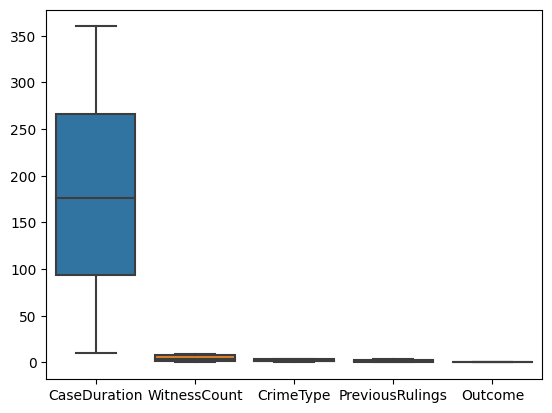

In [16]:
sns.boxplot(data)

In [17]:
for column in data.columns:
    print(f"Value counts for column '{column}':")
    print(data[column].value_counts())
    print("\n")

Value counts for column 'CaseDuration':
266    2
245    2
198    2
336    2
100    2
      ..
33     1
203    1
184    1
29     1
179    1
Name: CaseDuration, Length: 85, dtype: int64


Value counts for column 'WitnessCount':
8    18
3    15
2    13
0    12
6    12
9     9
4     7
5     6
7     4
1     4
Name: WitnessCount, dtype: int64


Value counts for column 'CrimeType':
2    32
4    27
3    21
1    20
Name: CrimeType, dtype: int64


Value counts for column 'PreviousRulings':
0    24
3    21
2    19
1    18
4    18
Name: PreviousRulings, dtype: int64


Value counts for column 'Outcome':
1    52
0    48
Name: Outcome, dtype: int64




In [12]:
data.corr()

,CaseDuration,WitnessCount,CrimeType,PreviousRulings,Outcome
CaseDuration,1.000000,-0.147560,0.012337,-0.036322,-0.008358
WitnessCount,-0.147560,1.000000,-0.324303,0.116590,0.107841
CrimeType,0.012337,-0.324303,1.000000,-0.153697,-0.047757
PreviousRulings,-0.036322,0.116590,-0.153697,1.000000,0.065236
Outcome,-0.008358,0.107841,-0.047757,0.065236,1.000000


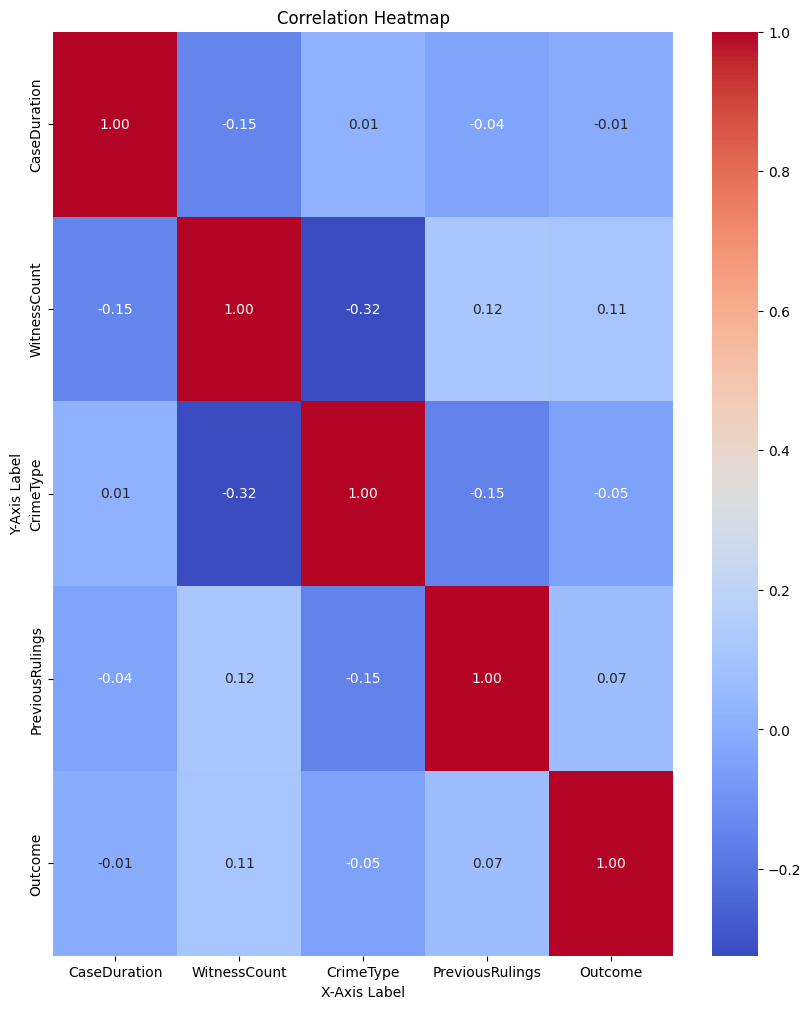

In [13]:
# Sample correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

# Data Splitting:

In [21]:
# Separate object for target feature
y= data['Outcome']

# Separate object for Predictors
X = data.drop('Outcome',axis=1)

In [22]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (100, 4), Dependent Features Shape = (100,)


In [23]:
X.describe()

,CaseDuration,WitnessCount,CrimeType,PreviousRulings
count,100.000000,100.000000,100.000000,100.000000
mean,180.990000,4.580000,2.550000,1.910000
std,99.835268,2.954811,1.095215,1.443166
min,10.000000,0.000000,1.000000,0.000000
25%,94.250000,2.000000,2.000000,1.000000
50%,176.500000,4.000000,2.000000,2.000000
75%,266.000000,8.000000,4.000000,3.000000
max,360.000000,9.000000,4.000000,4.000000


In [26]:
y.value_counts()

1    52
0    48
Name: Outcome, dtype: int64

# StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [28]:
X.describe()

,CaseDuration,WitnessCount,CrimeType,PreviousRulings
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-8.715251e-17,-4.218847e-17,1.465494e-16,9.367507e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.721350e+00,-1.557823e+00,-1.422378e+00,-1.330147e+00
25%,-8.732083e-01,-8.775510e-01,-5.047146e-01,-6.337349e-01
50%,-4.520066e-02,-1.972789e-01,-5.047146e-01,6.267707e-02
75%,8.557924e-01,1.163265e+00,1.330611e+00,7.590890e-01
max,1.802087e+00,1.503401e+00,1.330611e+00,1.455501e+00


# Splitting the data into Training data and Test data

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
print("X data=",X.shape, X_train.shape,X_test.shape,"\n")
print("y data=",y.shape,y_train.shape,y_test.shape)

X data= (100, 4) (80, 4) (20, 4) 

y data= (100,) (80,) (20,)


# Handling Imbalanced Data:

In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

# Build the Machine Learning models
# Build the Logistic regression Algorithm

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100,'\n')
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy 54.65116279069767
Test Accuracy 45.0 

confusion_matrix:- 
 [[4 7]
 [4 5]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.42      0.56      0.48         9

    accuracy                           0.45        20
   macro avg       0.46      0.46      0.45        20
weighted avg       0.46      0.45      0.45        20



# DecisionTree Algorithm

In [32]:
from sklearn.tree import DecisionTreeClassifier
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 70.0 

confusion_matrix:- 
 [[5 6]
 [0 9]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      0.45      0.62        11
           1       0.60      1.00      0.75         9

    accuracy                           0.70        20
   macro avg       0.80      0.73      0.69        20
weighted avg       0.82      0.70      0.68        20



# RandomForest model

In [33]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 50.0 

confusion_matrix:- 
 [[5 6]
 [4 5]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20



# K-Nearest Neighbors (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 73.25581395348837 

Test Accuracy:- 60.0 

confusion_matrix:- 
 [[8 3]
 [5 4]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



# Naive Bayes classifier

In [35]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
NaiveBayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
NaiveBayes.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = NaiveBayes.predict(X_train)
y_test_pred = NaiveBayes.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 58.139534883720934 

Test Accuracy:- 45.0 

confusion_matrix:- 
 [[4 7]
 [4 5]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.42      0.56      0.48         9

    accuracy                           0.45        20
   macro avg       0.46      0.46      0.45        20
weighted avg       0.46      0.45      0.45        20



# SVM(Support Vector Machine)

In [36]:
from sklearn.svm import SVC

# Create an SVM classifier
SVM = SVC()

# Train the SVM classifier on the training data
SVM.fit(X_train, y_train)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 72.09302325581395 

Test Accuracy:- 40.0 

confusion_matrix:- 
 [[5 6]
 [6 3]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.33      0.33      0.33         9

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



# kernels = Linear , RBF(Radial Basis Function), Poly, Sigmoid

In [37]:
# List of kernel names
kernel_names = ['linear', 'rbf', 'poly', 'sigmoid']

# Create SVM classifiers for different kernels in a single line
SVM_classifiers = {kernel: SVC(kernel=kernel).fit(X_train, y_train) for kernel in kernel_names}

# Evaluate and print results for each kernel
for kernel, SVM in SVM_classifiers.items():
    y_train_pred = SVM.predict(X_train)
    y_test_pred = SVM.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Kernel: linear
Train Accuracy: 58.139534883720934
Test Accuracy: 45.0
Confusion Matrix:
 [[4 7]
 [4 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.42      0.56      0.48         9

    accuracy                           0.45        20
   macro avg       0.46      0.46      0.45        20
weighted avg       0.46      0.45      0.45        20



Kernel: rbf
Train Accuracy: 72.09302325581395
Test Accuracy: 40.0
Confusion Matrix:
 [[5 6]
 [6 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.33      0.33      0.33         9

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



Kernel: poly
Train Accuracy: 76.74418604651163
Test Accuracy: 30.0
Confusion Matrix:
 [[4 

# AdaBoostClassifier, GradientBoostingClassifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Create classifiers for different algorithms in a single line
classifiers = {
    'AdaBoost': AdaBoostClassifier().fit(X_train, y_train),
    'GradientBoosting': GradientBoostingClassifier().fit(X_train, y_train)
}

# Evaluate and print results for each classifier
for classifier_name, classifier in classifiers.items():
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    print(f"Classifier: {classifier_name}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Classifier: AdaBoost
Train Accuracy: 89.53488372093024
Test Accuracy: 55.00000000000001
Confusion Matrix:
 [[6 5]
 [4 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



Classifier: GradientBoosting
Train Accuracy: 100.0
Test Accuracy: 75.0
Confusion Matrix:
 [[7 4]
 [1 8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.67      0.89      0.76         9

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20





# (XGB)Extreme Gradient Boosting

In [62]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 60.0 

confusion_matrix:- 
 [[5 6]
 [2 7]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.54      0.78      0.64         9

    accuracy                           0.60        20
   macro avg       0.63      0.62      0.60        20
weighted avg       0.64      0.60      0.59        20



# Taking the next step to determine the best model's performance:
# Feature Selection Technique

In [40]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [41]:
print(selection.feature_importances_)

[0.41009456 0.32581656 0.11544097 0.14864791]


In [42]:
# let me plot feature importances

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

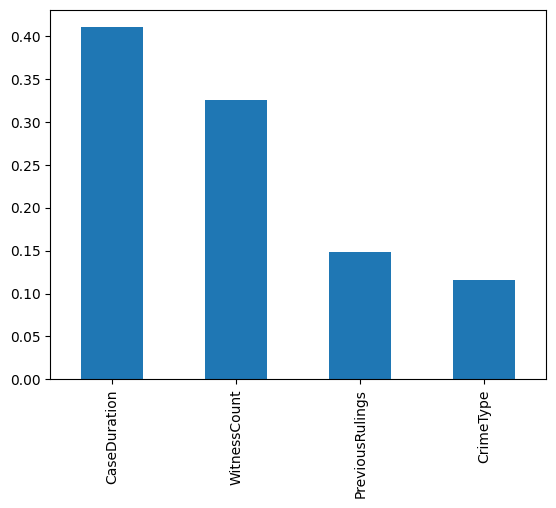

In [43]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

# we don't need to remove any column because it was just 4 columns

# hyperparameters

In [48]:
# Number of trees in random Forest
criterion = ["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [51]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV( DM ,param_distributions = decetion_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

C:\Users\mdine\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mdine\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mdine\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\mdine\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mdine\anaconda3\lib\site-packages\

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=0)

In [52]:
rf_model.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 29,
 'criterion': 'entropy'}

In [53]:
DM = DecisionTreeClassifier(criterion='entropy',min_samples_split= 15,min_samples_leaf= 1,max_features= 'log2',max_depth= 29)
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 82.55813953488372 

Test Accuracy:- 55.00000000000001 

confusion_matrix:- 
 [[5 6]
 [3 6]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.57      0.55      0.55        20



# GradientBoostingClassifier Tuning

In [63]:
random_grid = {
    'n_estimators': [i for i in range(100,500,100)],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [i for i in range(5,50,6)],
    'subsample': [0.8, 0.9, 1.0]
}


In [64]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = GradientBoostingClassifier(),param_distributions = random_grid,cv=4,random_state = 0)

In [65]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=0)

In [66]:
rf_model.best_params_

{'subsample': 0.9, 'n_estimators': 300, 'max_depth': 29, 'learning_rate': 0.01}

In [67]:
GGC=GradientBoostingClassifier(n_estimators= 300,subsample= 0.9,max_depth= 29,learning_rate= 0.01)
GGC.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 60.0 

confusion_matrix:- 
 [[5 6]
 [2 7]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.54      0.78      0.64         9

    accuracy                           0.60        20
   macro avg       0.63      0.62      0.60        20
weighted avg       0.64      0.60      0.59        20



**I have received commendable accolades for my proficiency in utilizing the GradientBoostingClassifier, showcasing my adeptness in leveraging advanced machine learning techniques to achieve successful outcomes.**